In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
# knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import pylab as plot

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for roc and auc curve
from sklearn.metrics import roc_curve, auc
# for cross validation
from sklearn.cross_validation import cross_val_score

C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('train (1).csv')

In [4]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


#  The count shows there is no missing values

In [7]:
data['Type'].value_counts()

1    8132
2    6861
Name: Type, dtype: int64

In [8]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

In [14]:
M=data['MaturitySize'].value_counts()

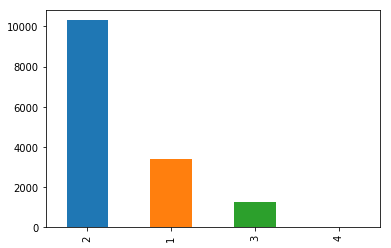

In [19]:
M.plot(kind='bar')

Most of the pets are medium mature

In [15]:
V=data['Vaccinated'].value_counts()

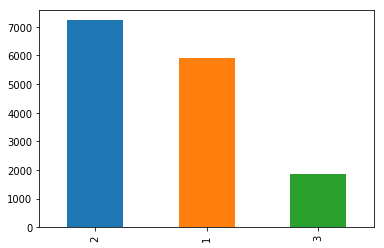

In [20]:
V.plot(kind='bar')

The number of pets vaccinated are les than number of pets not vaccinated

In [16]:
D=data['Dewormed'].value_counts()

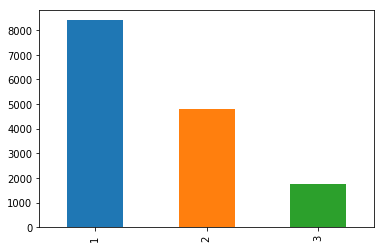

In [21]:
D.plot(kind='bar')

Mostly pets are dewormed

In [17]:
S=data['Sterilized'].value_counts()

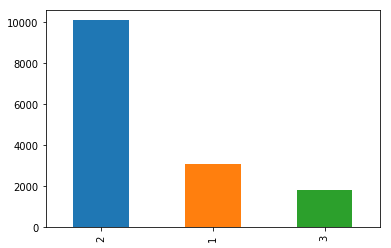

In [22]:
S.plot(kind='bar')

Pets who have been sterlized is way less than the non sterlized one

In [18]:
H=data['Health'].value_counts()

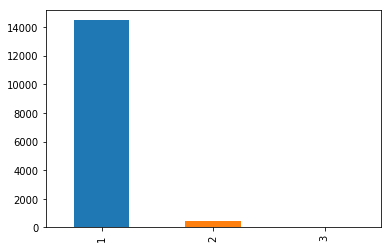

In [23]:
H.plot(kind='bar')

All the pets are healthy there is no serious injury to any pet,while there are few pets with medium injury

In [24]:
F=data['FurLength'].value_counts()

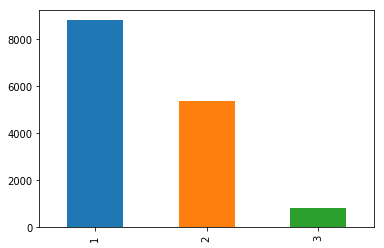

In [25]:
F.plot(kind='bar')

More of the pets have short fur length 

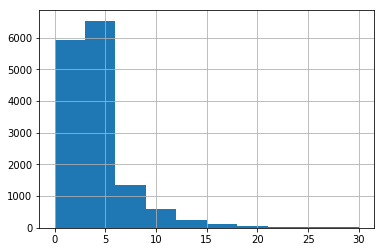

In [28]:
data['PhotoAmt'].hist(bins=10)

In [29]:
T = data['Type'].value_counts()

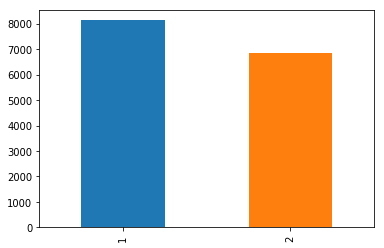

In [30]:
T.plot(kind='bar')

There are more dogs than cats

In [32]:
A1 = pd.crosstab(data['Type'],data['AdoptionSpeed'])
A1

AdoptionSpeed,0,1,2,3,4
Type,,,,,
1,170,1435,2164,1949,2414
2,240,1655,1873,1310,1783


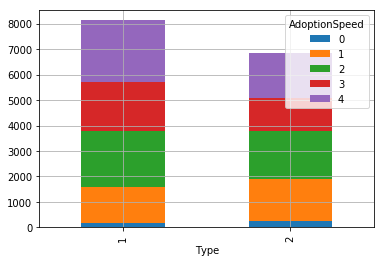

In [33]:
A1.plot(kind='bar',stacked=True,grid=True)

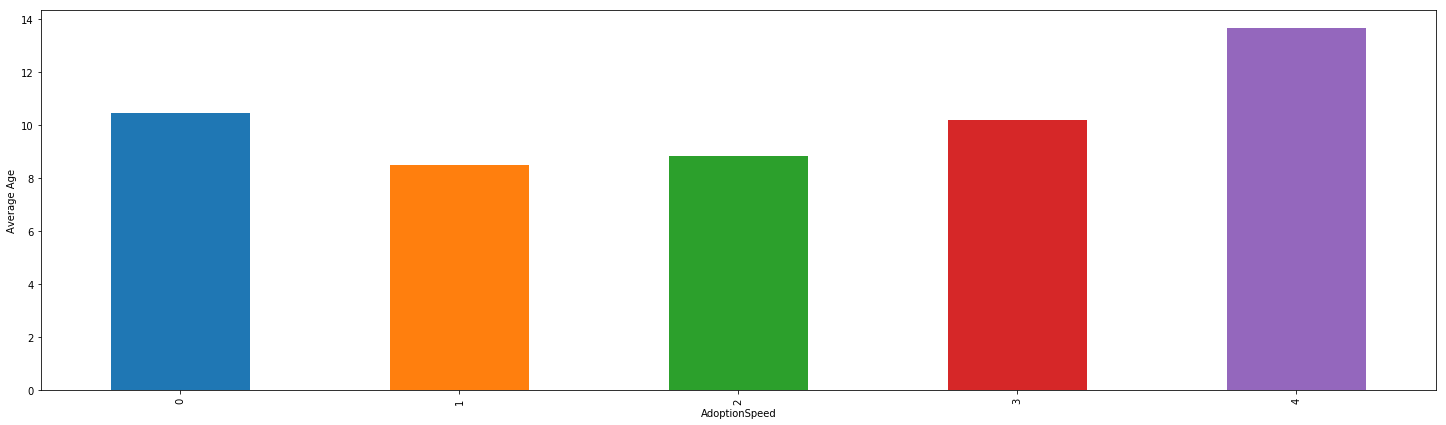

In [38]:
ax = plt.subplot()
ax.set_ylabel('Average Age')
data.groupby('AdoptionSpeed').mean()['Age'].plot(kind='bar', figsize=(25, 7), ax = ax);

The average age of pet adopted on the same day it was listed is 10
The average age of pet adopted on 1st week after been listed is 8
The average age of pet adopted on 1st month after been listed is 9
The average age of pet adopted after 100 days of listing is 13

In [40]:
A2= pd.crosstab(data['AdoptionSpeed'],data['Type'])
A2

Type,1,2
AdoptionSpeed,,
0,170,240
1,1435,1655
2,2164,1873
3,1949,1310
4,2414,1783


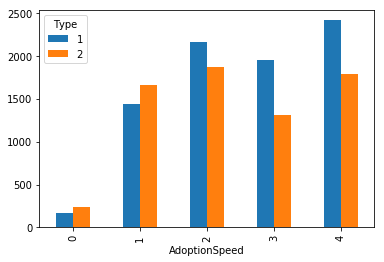

In [41]:
A2.plot(kind='bar')

1.More cats are adopted on the day they were listed and after 1 week of listing than dogs.
2.More dogs are adopted after 1 month of listing than cats

In [42]:
A3= pd.crosstab(data['AdoptionSpeed'],data['Sterilized'])
A3

Sterilized,1,2,3
AdoptionSpeed,,,
0,70,270,70
1,364,2378,348
2,656,3022,359
3,720,2251,288
4,1291,2156,750


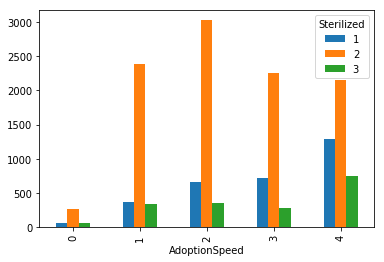

In [43]:
A3.plot(kind='bar')

The adoption speed of non sterlised pets are much more than sterlised ones

In [45]:
A4= pd.crosstab(data['AdoptionSpeed'],data['Dewormed'])
A4

Dewormed,1,2,3
AdoptionSpeed,,,
0,205,146,59
1,1572,1188,330
2,2273,1347,417
3,1988,914,357
4,2359,1220,618


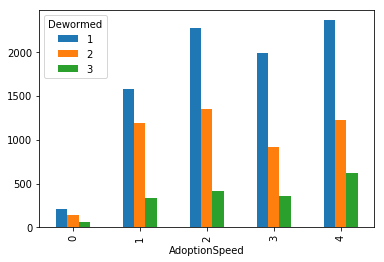

In [46]:
A4.plot(kind='bar')

The adoption speed of dewormed pets are higher than the wormed on.

In [47]:
A5= pd.crosstab(data['AdoptionSpeed'],data['Health'])
A5

Health,1,2,3
AdoptionSpeed,,,
0,392,17,1
1,2999,89,2
2,3925,106,6
3,3150,98,11
4,4012,171,14


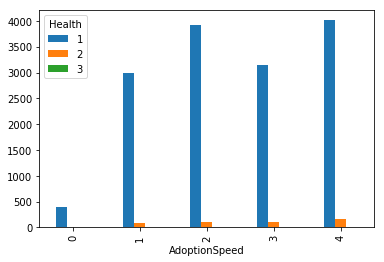

In [48]:
A5.plot(kind='bar')

The pets adoption speed is much more in healthy pets.

In [50]:
A6= pd.crosstab(data['AdoptionSpeed'],data['Vaccinated'])
A6

Vaccinated,1,2,3
AdoptionSpeed,,,
0,146,206,58
1,965,1777,348
2,1473,2112,452
3,1419,1459,381
4,1895,1673,629


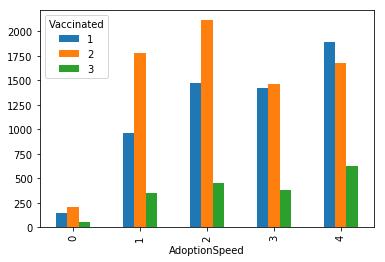

In [51]:
A6.plot(kind='bar')

Initially till one month of listing it is seen that the non vaccinated pets are more to be adopted.But as it crosses 100 days of listing Vaccinated pets are adopted more than the non vaccinated one.

In [53]:
A7= pd.crosstab(data['AdoptionSpeed'],data['MaturitySize'])
A7

MaturitySize,1,2,3,4
AdoptionSpeed,,,,
0,139,226,43,2
1,870,1909,304,7
2,884,2837,305,11
3,641,2360,248,10
4,861,2973,360,3


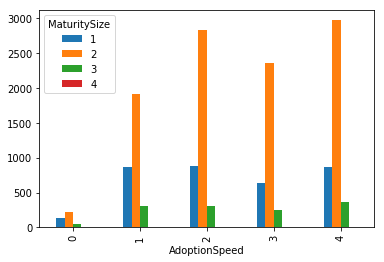

In [54]:
A7.plot(kind='bar')